In [52]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [53]:
# import Housing.csv
df = pd.read_csv('Dataset/cardio_data.csv')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [54]:
#test predictor ap_hi, ap_lo, cholesterol, and glucose
x = df[["ap_hi", "ap_lo", "cholesterol", "gluc"]]
y = df["cardio"]

x=x.to_numpy().reshape(-1,4)
y=y.to_numpy()

# Train Test split 
X_train=x[0:49000]
X_test=x[49000:70000]

Y_train=y[0:49000]
Y_test=y[49000:70000]

#plot scatter plots of train and test data
#plt.scatter(X_train,Y_train, color='#e00579')
#plt.scatter(X_test,Y_test, color='#71b3ef')

In [55]:
#train logisitc model
logr = LogisticRegression()
logr.fit(X_train,Y_train)

y_pred = logr.predict(X_test)
               
#model scores 
train_score=logr.score(X_train, Y_train)
print("train score:", train_score)

test_score=logr.score(X_test, Y_test)
print("test score:",test_score)

train score: 0.714204081632653
test score: 0.7117142857142857


In [56]:
penalty = 'l2'
C = 0.001
logr = LogisticRegression(penalty=penalty, C=C)
logr.fit(X_train, Y_train)
accuracy = logr.score(X_test, Y_test)
print("test score:",accuracy)

test score: 0.7201904761904762


In [57]:
θ_o=logr.intercept_
θ_1=logr.coef_
print(θ_o)
print(θ_1)

[-6.80258482]
[[ 4.89936768e-02  1.80040719e-04  4.48375545e-01 -5.81976142e-03]]


In [58]:
penalty = 'l2'
C = 0.01
logr = LogisticRegression(penalty=penalty, C=C)
logr.fit(X_train, Y_train)
accuracy = logr.score(X_test, Y_test)
print("test score:",accuracy)

test score: 0.7115714285714285


0
0
0
0
0
0


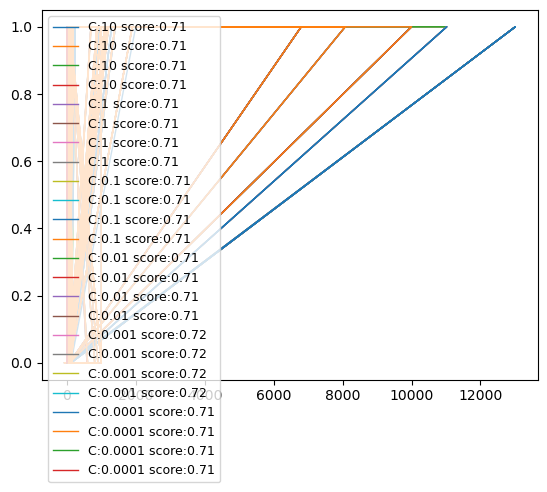

In [59]:
penalty = 'l2'
C = [ 10, 1, 0.1, 0.01, 0.001, 0.0001]
train_scores=[]
test_scores=[]
count=0

for i in C:  
    print(count)
    logr = LogisticRegression(penalty=penalty, C=i)
    logr.fit(X_train, Y_train)
    
    # predicting y with ridge model
    Y_pred = logr.predict(X_test)
    
    #model scores     
    train_score=logr.score(X_train, Y_train)
    test_score=logr.score(X_test, Y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    # plot ridge regression line
    plt.plot(X_test,Y_pred, linewidth=1, label='C:'+str(i)+' score:'+str(round(test_score, 2)))
    
plt.legend(fontsize=9, loc='upper left')

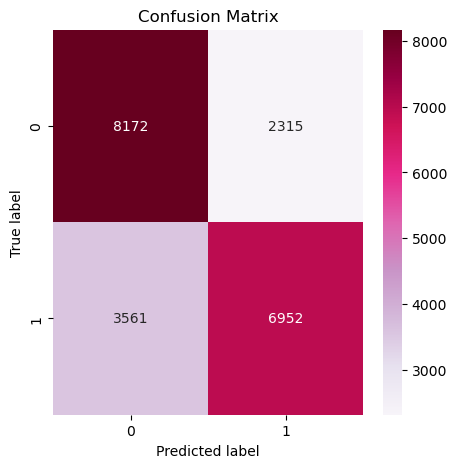

In [67]:
# Predict on the Test Data
logr = LogisticRegression(penalty=penalty, C=0.001)
logr.fit(X_train, Y_train)
    
y_pred = logr.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(Y_test, y_pred)
# Generate the confusion matrix
cm = confusion_matrix(Y_test, y_pred)
# Create a Confusion Matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='PuRd')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()